<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/WS_2.6_Confidence_intervals_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook we will practice calculating and summarizing descriptive statistics to describe a single variable. The objectives are:

1. Select values for variables from a pandas data frame.
2. Clean the data
3. Calculate confidence intervals for means of variables
4. Calculate confidence intervals for medians of variables

First we import the neccessary libraries. Today we use one new library for statistics tool `scipy.stats`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from google.colab import files
import io

Let's read the file 'datareg.xlsx' that we used in previous worksheets. I uploaded the file to my Github account for easier importing.

In [2]:
data_url = "https://github.com/lhprime/MATH105/blob/main/datareg.xlsx?raw=true"
data = pd.read_excel(data_url)

In [3]:
data

,HHSEX,AGE,EDUC,INCOME,NETWORTH
0,1,54,11,20290.628707,-400.0
1,1,54,11,20290.628707,-400.0
2,1,54,11,20290.628707,-400.0
3,1,54,11,20290.628707,-400.0
4,1,54,11,20290.628707,-400.0
...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0
30071,1,76,13,36523.131673,-101700.0
30072,1,76,13,35508.600237,-120600.0
30073,1,76,13,43624.851720,-130300.0


#Selecting and cleaning variables

In this worksheet we will practice comparing two groups of income based on some factor. First let's explore how the factor "AGE" affect the income. We will look at the descriptive statistics of the "AGE" column to have a better view of the data.

In [4]:
data.AGE.describe()

count    30075.000000
mean        51.753283
std         16.170621
min         18.000000
25%         39.000000
50%         52.000000
75%         63.000000
max         95.000000
Name: AGE, dtype: float64

We can see that our data is quite large and contains values from 18 to 95. Let's say we want to see if older people have different income compared to young people. For example we can define young to have AGE less than 40 and old to have AGE more than 60 and extract the INCOME data into two corresponding variables `young_income` and `old_income`.

In [39]:
young_income = data[data.AGE < 40].INCOME
young_income

5        22319.691578
6        22319.691578
7        22319.691578
8        22319.691578
9        22319.691578
             ...     
30065    16232.502966
30066    16232.502966
30067    19276.097272
30068    18261.565836
30069    17247.034401
Name: INCOME, Length: 7535, dtype: float64

In [34]:
old_income = data[data.AGE > 60].INCOME
old_income

25       32465.005931
26       48697.508897
27       49712.040332
28       32465.005931
29       32465.005931
             ...     
30070    38552.194543
30071    36523.131673
30072    35508.600237
30073    43624.851720
30074    41595.788849
Name: INCOME, Length: 9185, dtype: float64

Now that we have our variables, let's clean them before comparing. The first step is to look at their boxplots to see if there is outlier.

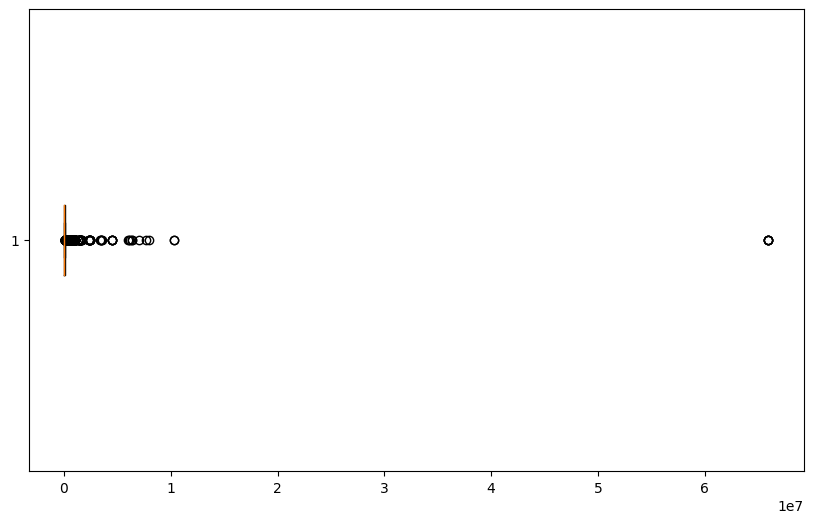

In [40]:
# produce the box plot of young_income here
plt.figure(figsize=(10,6))
plt.boxplot(young_income, vert = False)
plt.show()

We can see that `young_income` has many outliers on the right. Let's clean them using the IQR. To support the long right tail we will use a larger coefficient of 2.5 on the right.

In [50]:
# clean the outliers of young_income using 2.5 IQR for the upper wishker. Use the same variable young_income to store the cleaned data 
q1_low,q3_low = young_income.quantile([0.25,0.75])
low_whisker_low = q1_low - 1.5*(q3_low - q1_low)
upp_whisker_low = q3_low + 2.5*(q3_low - q1_low)
young_income = young_income[(young_income<=upp_whisker_low)&(young_income>=low_whisker_low)]

Let's look at the box plot of the cleaned variable.

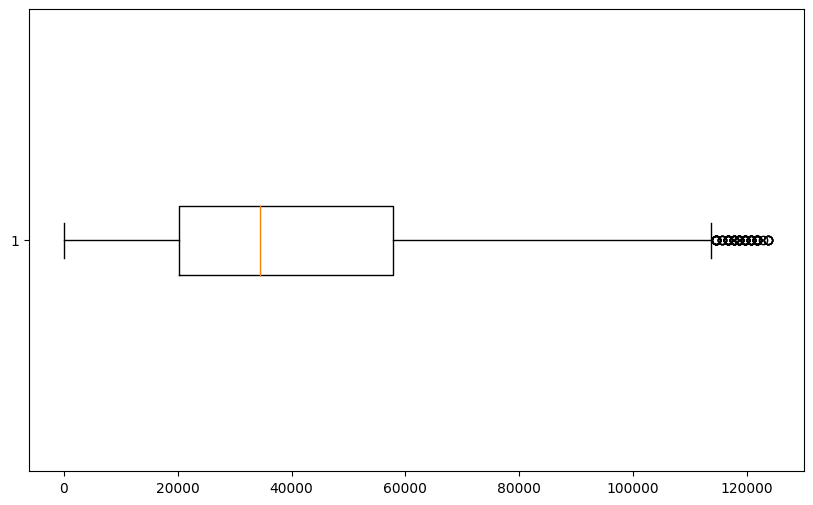

In [54]:
# produce the box plot of the new variable here
plt.figure(figsize=(10,6))
plt.boxplot(young_income, vert = False)
plt.show()

**Exercise:** Clean the variable `old_income` using the same method.

In [57]:
#Solution goes here
q1_old,q3_old = old_income.quantile([0.25,0.75])
low_whisker_old = q1_old - 1.5*(q3_old - q1_old)
upp_whisker_old = q3_old + 2.5*(q3_old - q1_old)
old_income = old_income[(old_income<=upp_whisker_old)&(old_income>=low_whisker_old)]

Now that we have two variables cleaned, let's look at their histograms to see if there is any difference.

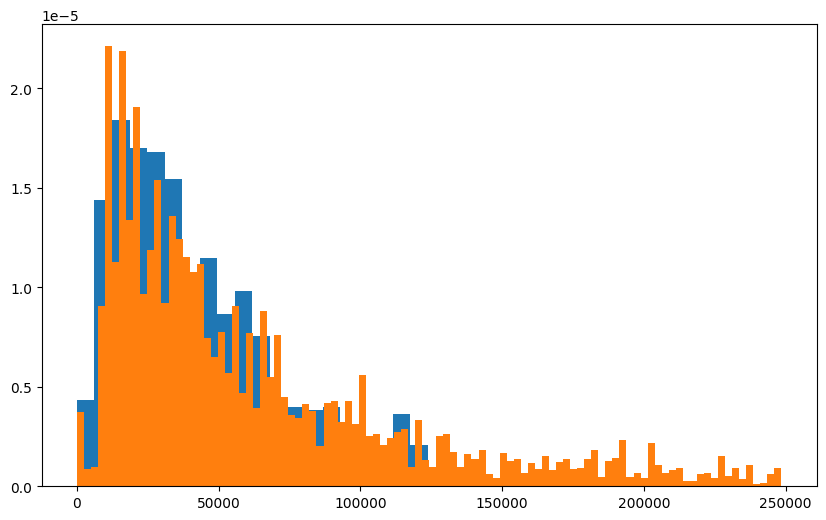

In [61]:
plt.figure(figsize=(10,6))
plt.hist(young_income, bins = 20, density = True)
plt.hist(old_income, bins = 100, density = True)
plt.show()

**Question:** By looking at the two histograms, can you conclude any thing about the two variables?

#Comparing variables using confidence intervals of the means


The easiest way to compare two variables is to look at their basic statistics. For measuring the centers we can use the sample mean or the median. Let's look at the sample means first.

In [63]:
# calculate the means of young_income and old_income here
mean_young = young_income.mean()
mean_old = old_income.mean()
mean_young, mean_old

(42264.229299926745, 62291.92243282546)

We can see that the difference of two means a quite large. Remember that these are sample means, which means they are random and depend on the samples. We would want to know if this large difference could happen by chance or not. One way to do so is to calculate the Confidence intervals for the population means.

To calculate the confidence interval, because of the Central limit theorem, we can use the  normal distribution `norm` from `scipy.stats` and the function `interval`. We need to input the following parameters: 
* the confidence level: 95%, 90%, etc.
* `loc` = the sample mean  
* `scale` = the sample standard error of the mean `.sem()` (this is actually the sample standard deviation divided by square root of sample size)

The output will be a list of 2 numbers: the left end value and the right end value of the interval. We will use an array of length 2 named `ci_n_young` to store these two numbers.

In [64]:
ci_n_young = st.norm.interval(0.95, loc=young_income.mean(),scale=young_income.sem())
ci_n_young

(41581.686777397714, 42946.771822455776)

**Exercise:** Calculate the confidence interval for the mean of `old_income` and store the values in an array named `ci_n_old`.

In [65]:
#Solution goes here
ci_n_old = st.norm.interval(0.95, loc=old_income.mean(),scale=old_income.sem())
ci_n_old

(61030.0550715766, 63553.78979407431)

We can graph the sample means with the confidence intervals showed as possible error. To do this, we need to add in 2 options for the `plt.bar` function: 
* `yerr` is the length of the "whiskers", here we set it to be half of the length of the confidence interval
* `capsize` is the size of the caps at the two ends of the intervals

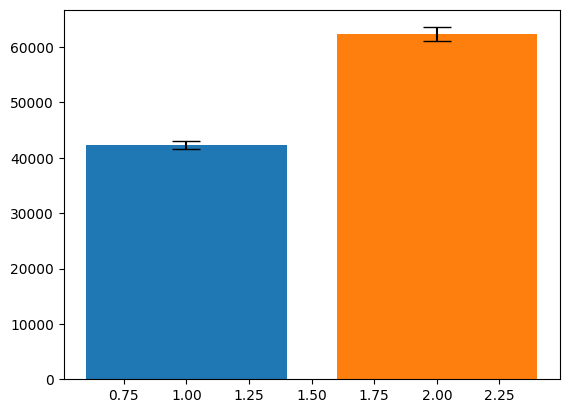

In [66]:
plt.bar(1, young_income.mean(), capsize=10,  yerr = (ci_n_young[1]-ci_n_young[0])/2)
plt.bar(2, old_income.mean(), capsize=10,  yerr = (ci_n_old[1]-ci_n_old[0])/2)
plt.show()

Looking at the two confidence intervals we can safely conclude that the `old_income` is much larger than the `young_income`.